In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline

In [2]:
df_airline=pd.read_csv(r'C:\Users\Admin\Downloads\airline_passengers.csv')

In [3]:
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [11]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [13]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [15]:
df_airline.dropna(axis=0, inplace=True)

In [17]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [19]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [21]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [23]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [25]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [27]:
df_airline.set_index('Month', inplace=True)

In [29]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


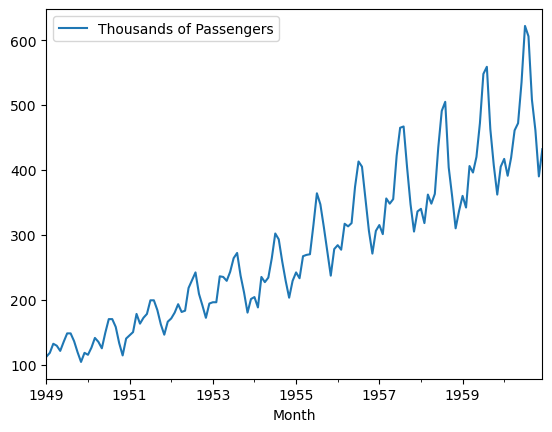

In [31]:
df_airline.plot()
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

In [35]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Stats :{}'.format(result[0]))
    print('p-value {}'.format(result[1]))

    if result[1]<= 0.05:
        print("stationary")
    else:
        print("non stationary")
    

In [41]:
adf_test(df_airline['Thousands of Passengers'])

ADF Stats :0.8153688792060597
p-value 0.9918802434376411
non stationary


In [43]:
## Use Differencing technique 

df_airline['Passengers first Differencing']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [45]:
df_airline.head()

,Thousands of Passengers,Passengers first Differencing
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [66]:
adf_test(df_airline['Passengers first Differencing'].dropna())

ADF Stats :-2.829266824169992
p-value 0.0542132902838265
non stationary


In [68]:
df_airline['Passengers second Differencing']=df_airline['Passengers first Differencing']-df_airline['Passengers first Differencing'].shift(1)

In [70]:
adf_test(df_airline['Passengers second Differencing'].dropna())

ADF Stats :-16.384231542468527
p-value 2.732891850014085e-29
stationary


Strong evidence against the null hypothesis reject the null hypothesis. data has no unit root and is stationary

In [75]:
### 12 months 
## Use Techniques Differencing

df_airline['Passengers 12 Differencing']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)


In [77]:
adf_test(df_airline['Passengers 12 Differencing'].dropna())

ADF Stats :-3.3830207264924805
p-value 0.011551493085514982
stationary


In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

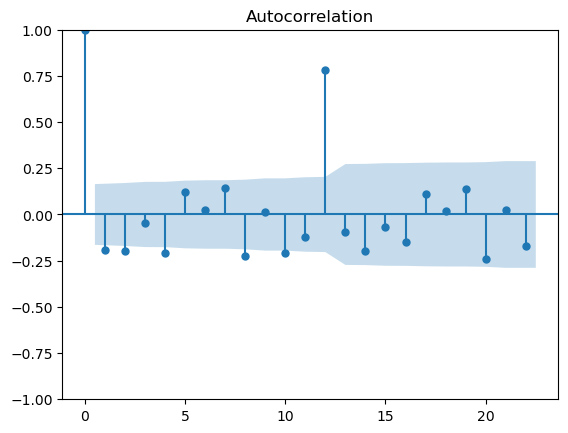

In [81]:
acf=plot_acf(df_airline['Passengers second Differencing'].dropna())
plt.show()

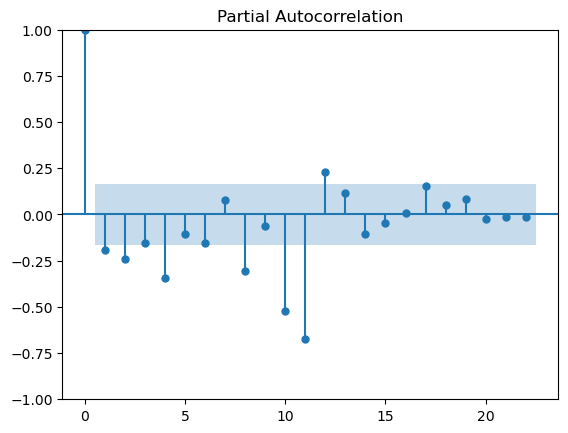

In [115]:
pacf=plot_pacf(df_airline['Passengers second Differencing'].dropna())
plt.show()

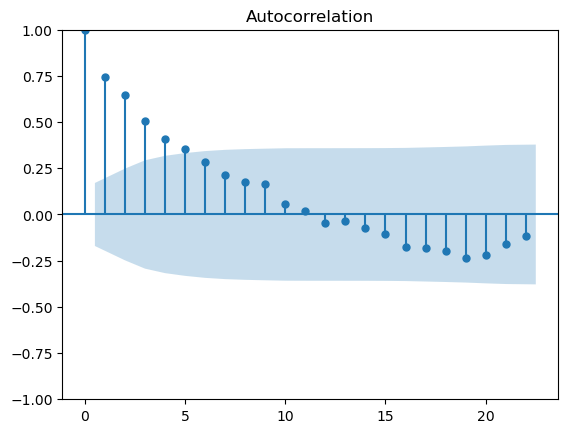

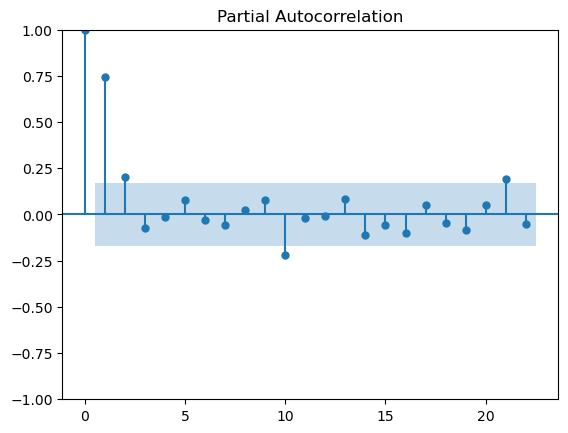

In [176]:
acf12=plot_acf(df_airline['Passengers 12 Differencing'].dropna())
pacf12=plot_pacf(df_airline['Passengers 12 Differencing'].dropna())
plt.show()

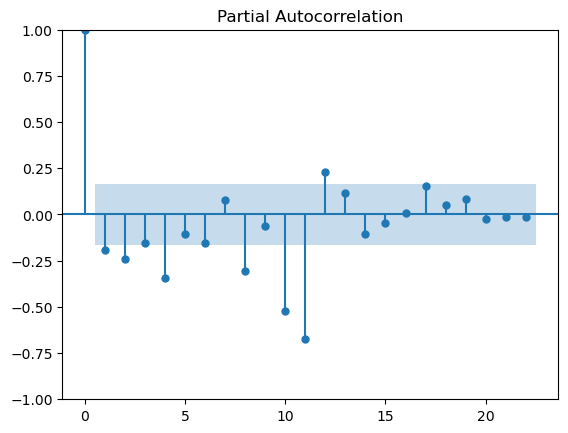

In [177]:
result = plot_pacf(df_airline["Passengers second Differencing"].dropna())
plt.show()

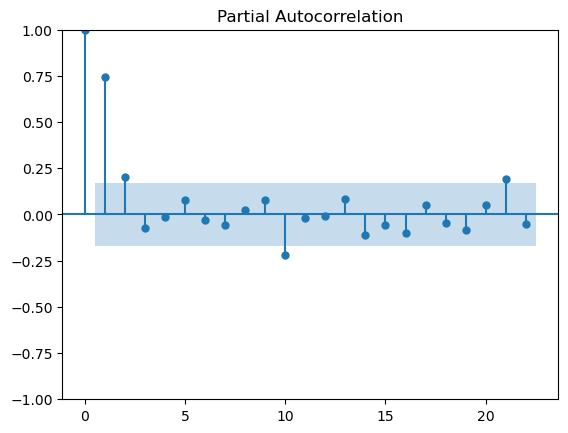

In [179]:
pacf12=plot_pacf(df_airline['Passengers 12 Differencing'].dropna())
plt.show()

In [181]:
df_airline

,Thousands of Passengers,Passengers first Differencing,Passengers second Differencing,Passengers 12 Differencing
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [184]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [186]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [188]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [190]:
test_data

,Thousands of Passengers,Passengers first Differencing,Passengers second Differencing,Passengers 12 Differencing
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [192]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA


In [194]:
from statsmodels.tsa.arima.model import ARIMA


In [196]:
train_data

,Thousands of Passengers,Passengers first Differencing,Passengers second Differencing,Passengers 12 Differencing
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [240]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(0,2,10))
model_Arima_fit = model_ARIMA.fit()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

In [241]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(0, 2, 10)   Log Likelihood                -349.482
Date:                     Wed, 09 Apr 2025   AIC                            720.964
Time:                             12:12:50   BIC                            747.438
Sample:                         01-01-1949   HQIC                           731.593
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7757   1658.495     -0.000      1.000   -3251.367    3249.815
ma.L2         -0.1288   2668.196  -4.83e-05      1.000   -5229.697    5229.440
ma.L3         -0.5251   2509.871     -0.000      1.000   -4919.782    4918.732
ma.L4         -0.4805   3347.339     -0.000      1.000   -6561.144    6560.183
ma.L5          0.2420   2471.333   9.79e-05      1.000   -4843.482    4843.966
ma.L6          0.1646   2285.019    7.2e-05      1.000   -4478.390    4478.719
ma.L7          0.6124   2392.913      0.000      1.000   -4689.411    4690.636
ma.L8          0.2910   1507.345      0.000      1.000   -2954.051    2954.633
ma.L9          0.4464   2011.178      0.000      1.000   -3941.391    3942.283
ma.L10        -0.8462   1206.070     -0.001      0.999   -2364.701    2363.008
sigma2       213.6299   3.04e+05      0.001      0.999   -5.97e+05    5.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.26   Prob(JB):                         0.97
Heteroskedasticity (H):               2.70   Skew:                             0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [242]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [243]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [244]:
residuals

Month
1956-01-01    -20.466373
1956-02-01    -43.749443
1956-03-01     -4.375736
1956-04-01     18.701586
1956-05-01     56.400454
1956-06-01    118.832700
1956-07-01    140.383824
1956-08-01    118.480022
1956-09-01     45.685380
1956-10-01     -5.495579
1956-11-01    -42.676539
1956-12-01     -9.857498
1957-01-01     -3.038458
1957-02-01    -19.219417
1957-03-01     33.599623
1957-04-01     23.418664
1957-05-01     28.237704
1957-06-01     93.056745
1957-07-01    133.875786
1957-08-01    133.694826
1957-09-01     68.513867
1957-10-01      9.332907
1957-11-01    -34.848052
1957-12-01     -6.029012
1958-01-01     -4.209971
1958-02-01    -28.390930
1958-03-01     13.428110
1958-04-01     -2.752849
1958-05-01     10.066191
1958-06-01     79.885232
1958-07-01    133.704272
1958-08-01    145.523313
1958-09-01     42.342354
1958-10-01     -4.838606
1958-11-01    -56.019565
1958-12-01    -31.200525
1959-01-01    -10.381484
1959-02-01    -30.562444
1959-03-01     31.256597
1959-04-01     19.0

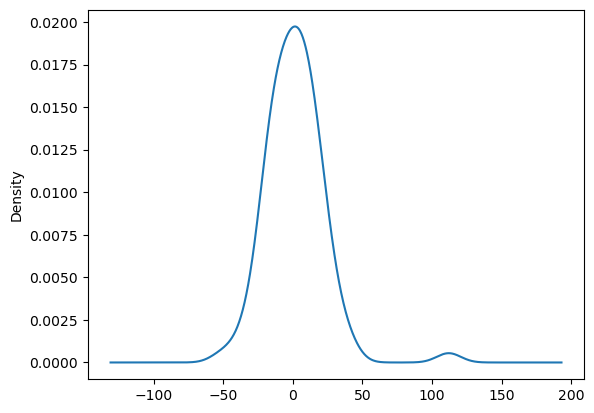

In [245]:
model_Arima_fit.resid.plot(kind='kde')
plt.show()

In [247]:
test_data['predicted_ARIMA']=pred

C:\Users\Admin\AppData\Local\Temp\ipykernel_2816\1427892835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_ARIMA']=pred


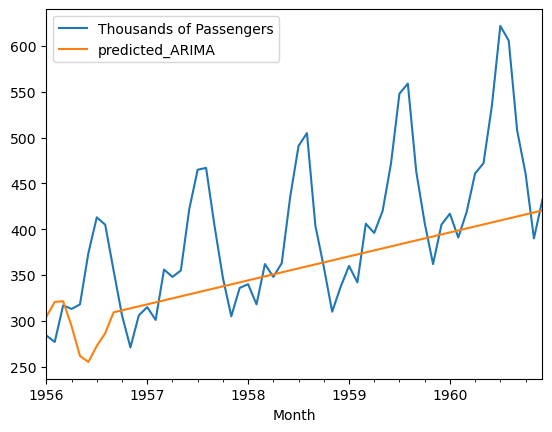

In [252]:
test_data[['Thousands of Passengers','predicted_ARIMA']].plot()
plt.show()

In [261]:
### Create a SARIMA Model 

from statsmodels.tsa.statespace.sarimax import SARIMAX

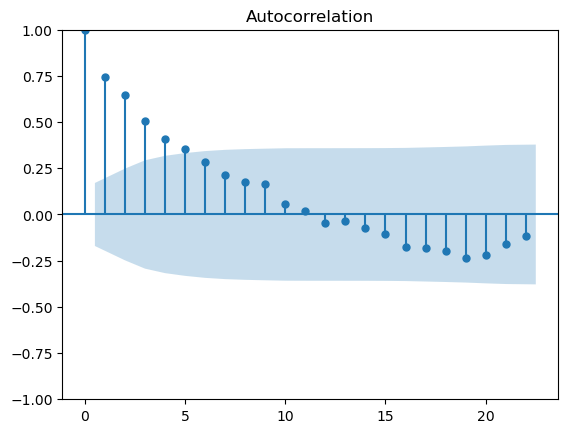

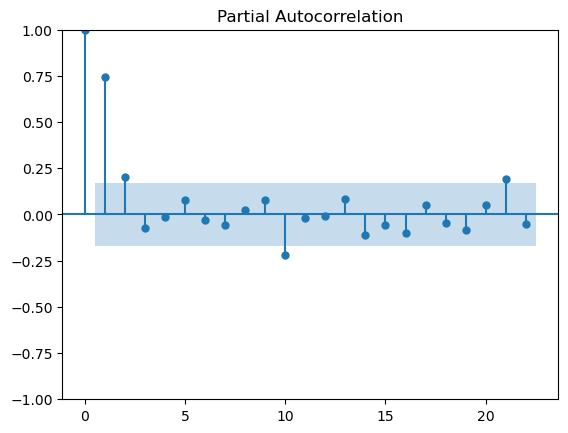

In [269]:
acf12=plot_acf(df_airline['Passengers 12 Differencing'].dropna())
pacf12=plot_pacf(df_airline['Passengers 12 Differencing'].dropna())
plt.show()

In [263]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'], order=(3,0,5), seasonal_order=(0,1,0,12))

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [265]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [271]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Wed, 09 Apr 2025   AIC                            548.481
Time:                                     12:26:48   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5982      0.937      0.638      0.523      -1.239       2.435
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.164      0.158      0.874      -2.097       2.465
ma.L2         -0.5340      1.262     -0.423      0.672      -3.007       1.939
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1273      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7334     81.111      1.082      0.279     -71.240     246.707
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [273]:
test_data.tail()

,Thousands of Passengers,Passengers first Differencing,Passengers second Differencing,Passengers 12 Differencing,predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,411.819713
1960-09-01,508.0,-98.0,-82.0,45.0,414.000673
1960-10-01,461.0,-47.0,51.0,54.0,416.181632
1960-11-01,390.0,-71.0,-24.0,28.0,418.362592
1960-12-01,432.0,42.0,113.0,27.0,420.543551


In [275]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [277]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

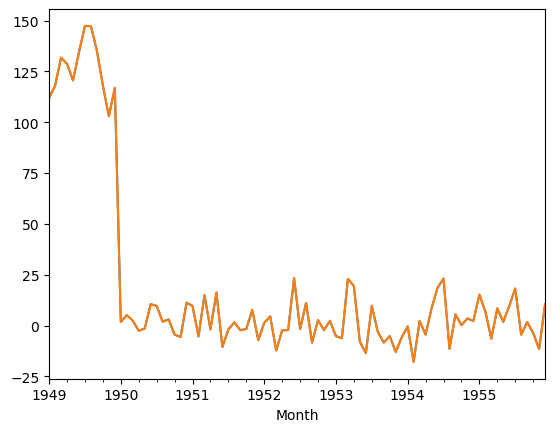

In [281]:
model_SARIMA_fit.resid.plot()
plt.show()

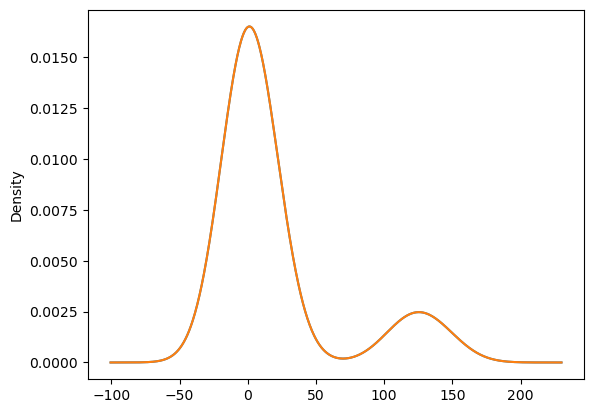

In [285]:
model_SARIMA_fit.resid.plot(kind='kde')
plt.show()

In [287]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Admin\AppData\Local\Temp\ipykernel_2816\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [289]:
test_data

,Thousands of Passengers,Passengers first Differencing,Passengers second Differencing,Passengers 12 Differencing,predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,304.466373,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,320.749443,NaN
1956-03-01,317.0,40.0,47.0,50.0,321.375736,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,294.298414,NaN
1956-05-01,318.0,5.0,9.0,48.0,261.599546,NaN
1956-06-01,374.0,56.0,51.0,59.0,255.167300,NaN
1956-07-01,413.0,39.0,-17.0,49.0,272.616176,403.397378
1956-08-01,405.0,-8.0,-47.0,58.0,286.519978,385.070356
1956-09-01,355.0,-50.0,-42.0,43.0,309.314620,349.444809


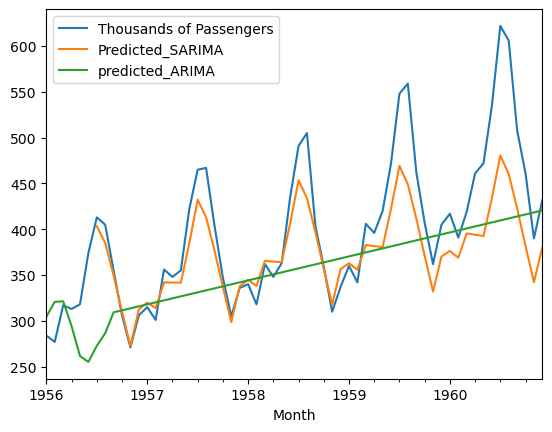

In [297]:
test_data[['Thousands of Passengers','Predicted_SARIMA','predicted_ARIMA']].plot()
plt.show()